# Settings

In [563]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [564]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((22750, 12), (12250, 11))

In [565]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52


# Data Cleaning and EDA

In [566]:
train.isnull().sum()/len(train.index)  #checking null values 

Employee ID                     0.000000
Date of Joining                 0.000000
Gender                          0.000000
Company Type                    0.000000
WFH Setup Available             0.000000
Age                             0.000000
Tenure                          0.000000
Vacations taken                 0.000000
Designation                     0.000000
Average Hours worked per day    0.060703
Employee satisfaction score     0.093055
Mental Fatigue Score            0.044440
dtype: float64

In [567]:
#as null values are less than 10% of the whole dataset, we can remove these
train = train.dropna()
train.isnull().sum()/len(train.index)

Employee ID                     0.0
Date of Joining                 0.0
Gender                          0.0
Company Type                    0.0
WFH Setup Available             0.0
Age                             0.0
Tenure                          0.0
Vacations taken                 0.0
Designation                     0.0
Average Hours worked per day    0.0
Employee satisfaction score     0.0
Mental Fatigue Score            0.0
dtype: float64

In [568]:
train.shape

(18670, 12)

In [569]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,39,14,4,2,5,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,51,9,4,1,2,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,30,5,8,1,3,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,22,5,6,3,6,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,62,10,3,2,5,6.4


In [570]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18670 entries, 0 to 22749
Data columns (total 12 columns):
Employee ID                     18670 non-null object
Date of Joining                 18670 non-null object
Gender                          18670 non-null object
Company Type                    18670 non-null object
WFH Setup Available             18670 non-null object
Age                             18670 non-null int64
Tenure                          18670 non-null int64
Vacations taken                 18670 non-null int64
Designation                     18670 non-null int64
Average Hours worked per day    18670 non-null float64
Employee satisfaction score     18670 non-null float64
Mental Fatigue Score            18670 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.9+ MB


In [571]:
#train['ID'] = train['Employee ID'].apply(lambda x:x.strip('fffe'))
#test['ID'] = test['Employee ID'].apply(lambda x:x.strip('fffe'))

In [572]:
train.head(2)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36


In [573]:
for feature in train.columns:
    print("Unique values for",feature,len(train[feature].unique()))

Unique values for Employee ID 18670
Unique values for Date of Joining 366
Unique values for Gender 2
Unique values for Company Type 2
Unique values for WFH Setup Available 2
Unique values for Age 45
Unique values for Tenure 20
Unique values for Vacations taken 13
Unique values for Designation 6
Unique values for Average Hours worked per day 10
Unique values for Employee satisfaction score 101
Unique values for Mental Fatigue Score 101


In [574]:
for feature in test.columns:
    print("Unique values for",feature,len(train[feature].unique()))

Unique values for Employee ID 18670
Unique values for Date of Joining 366
Unique values for Gender 2
Unique values for Company Type 2
Unique values for WFH Setup Available 2
Unique values for Age 45
Unique values for Tenure 20
Unique values for Vacations taken 13
Unique values for Designation 6
Unique values for Average Hours worked per day 10
Unique values for Employee satisfaction score 101


In [575]:
#dummy variables for catg variables
Gen = pd.get_dummies(train['Gender'],drop_first=True)
train = pd.concat([train, Gen], axis = 1)
print(train.shape)

Cy = pd.get_dummies(train['Company Type'],drop_first=True)
train = pd.concat([train, Cy], axis = 1)
print(train.shape)

wfh = pd.get_dummies(train['WFH Setup Available'],drop_first=True)
train = pd.concat([train, wfh], axis = 1)
print(train.shape) 

desig = pd.get_dummies(train['Designation'],drop_first=True)
train = pd.concat([train, desig], axis = 1)
print(train.shape) 

(18670, 13)
(18670, 14)
(18670, 15)
(18670, 20)


In [576]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,Male,Service,Yes,1,2,3,4,5
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16,0,1,0,0,1,0,0,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36,1,1,1,1,0,0,0,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20,1,1,1,1,0,0,0,0
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52,0,1,0,0,0,1,0,0
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,44,8,10,2,4.0,3.6,0.29,1,0,1,0,1,0,0,0


In [577]:
#dummy variables for catg variables
Gen = pd.get_dummies(test['Gender'],drop_first=True)
test = pd.concat([test, Gen], axis = 1)
print(test.shape)

Cy = pd.get_dummies(test['Company Type'],drop_first=True)
test = pd.concat([test, Cy], axis = 1)
print(test.shape)

wfh = pd.get_dummies(test['WFH Setup Available'],drop_first=True)
test = pd.concat([test, wfh], axis = 1)
print(test.shape) 

desig = pd.get_dummies(test['Designation'],drop_first=True)
test = pd.concat([test, desig], axis = 1)
print(test.shape) 

(12250, 12)
(12250, 13)
(12250, 14)
(12250, 19)


In [578]:
test['Date of Joining'] = pd.to_datetime(test['Date of Joining'])
test["DOJ Month"] = pd.DatetimeIndex(test['Date of Joining']).month
test["DOJ Day"] = pd.DatetimeIndex(test['Date of Joining']).day
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 21 columns):
Employee ID                     12250 non-null object
Date of Joining                 12250 non-null datetime64[ns]
Gender                          12250 non-null object
Company Type                    12250 non-null object
WFH Setup Available             12250 non-null object
Age                             12250 non-null int64
Tenure                          12250 non-null int64
Vacations taken                 12250 non-null int64
Designation                     12250 non-null int64
Average Hours worked per day    12250 non-null int64
Employee satisfaction score     12250 non-null float64
Male                            12250 non-null uint8
Service                         12250 non-null uint8
Yes                             12250 non-null uint8
1                               12250 non-null uint8
2                               12250 non-null uint8
3                           

In [579]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])
#train["DOJ Year"] = pd.DatetimeIndex(train['Date of Joining']).year
train["DOJ Month"] = pd.DatetimeIndex(train['Date of Joining']).month
train["DOJ Day"] = pd.DatetimeIndex(train['Date of Joining']).day
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18670 entries, 0 to 22749
Data columns (total 22 columns):
Employee ID                     18670 non-null object
Date of Joining                 18670 non-null datetime64[ns]
Gender                          18670 non-null object
Company Type                    18670 non-null object
WFH Setup Available             18670 non-null object
Age                             18670 non-null int64
Tenure                          18670 non-null int64
Vacations taken                 18670 non-null int64
Designation                     18670 non-null int64
Average Hours worked per day    18670 non-null float64
Employee satisfaction score     18670 non-null float64
Mental Fatigue Score            18670 non-null float64
Male                            18670 non-null uint8
Service                         18670 non-null uint8
Yes                             18670 non-null uint8
1                               18670 non-null uint8
2                       

In [580]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,...,Male,Service,Yes,1,2,3,4,5,DOJ Month,DOJ Day
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,...,0,1,0,0,1,0,0,0,9,30
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,...,1,1,1,1,0,0,0,0,11,30
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,...,1,1,1,1,0,0,0,0,11,3
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,...,0,1,0,0,0,1,0,0,7,24
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,44,8,10,2,4.0,...,1,0,1,0,1,0,0,0,11,26


In [581]:
train = train.drop(columns=['Gender','Company Type','WFH Setup Available','Designation','Employee ID','Date of Joining'])
test = test.drop(columns=['Gender','Company Type','WFH Setup Available','Designation','Employee ID','Date of Joining'])

In [582]:
train.head()

,Age,Tenure,Vacations taken,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,Male,Service,Yes,1,2,3,4,5,DOJ Month,DOJ Day
0,52,18,8,3.0,3.8,0.16,0,1,0,0,1,0,0,0,9,30
1,26,12,4,2.0,5.0,0.36,1,1,1,1,0,0,0,0,11,30
3,59,20,12,1.0,2.6,0.20,1,1,1,1,0,0,0,0,11,3
4,63,10,9,7.0,6.9,0.52,0,1,0,0,0,1,0,0,7,24
5,44,8,10,4.0,3.6,0.29,1,0,1,0,1,0,0,0,11,26


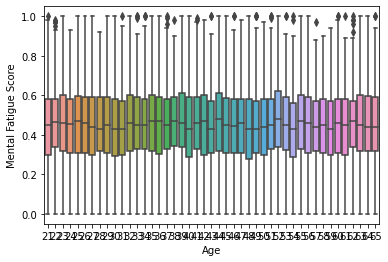

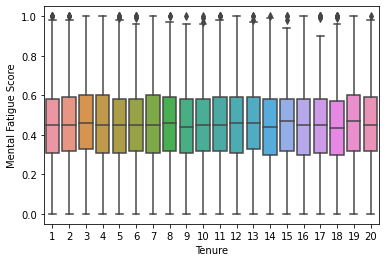

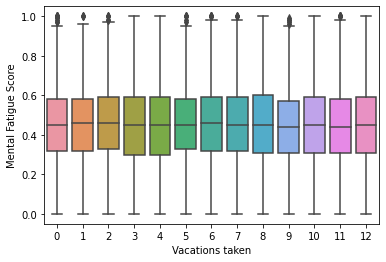

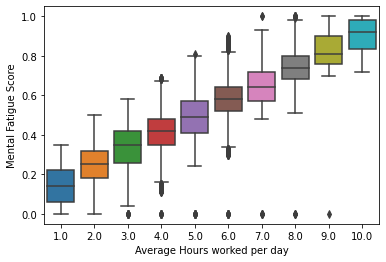

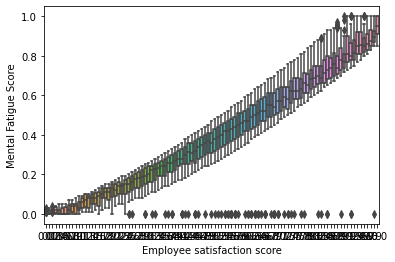

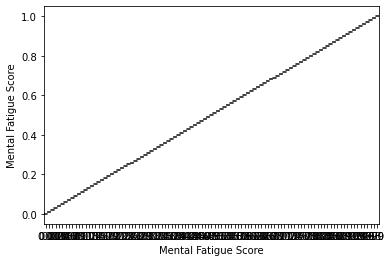

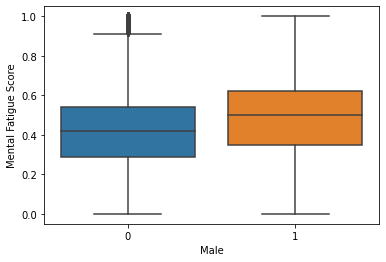

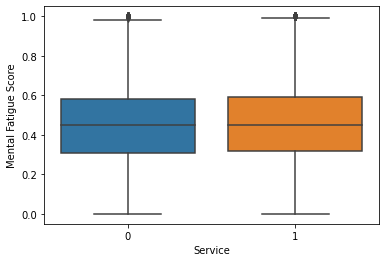

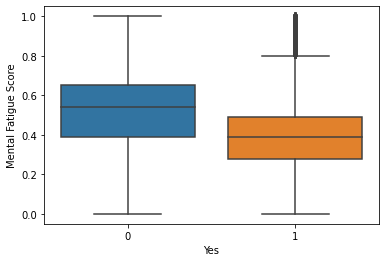

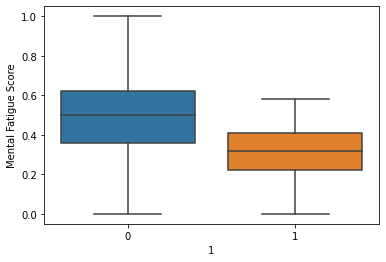

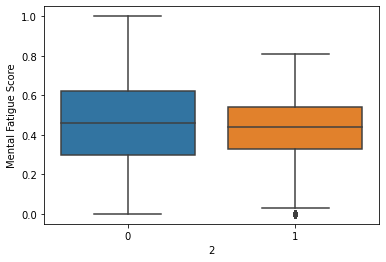

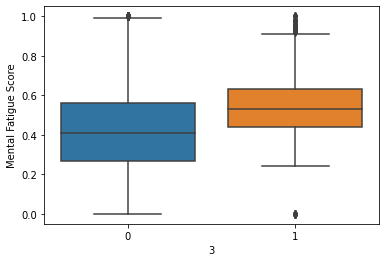

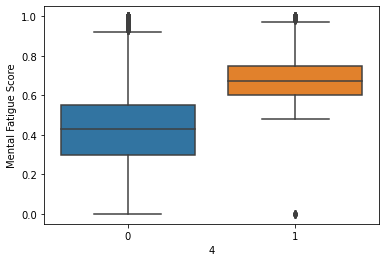

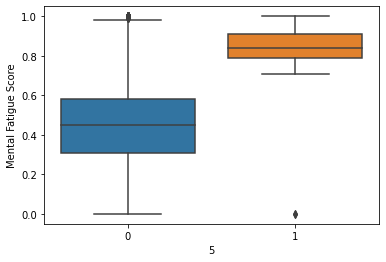

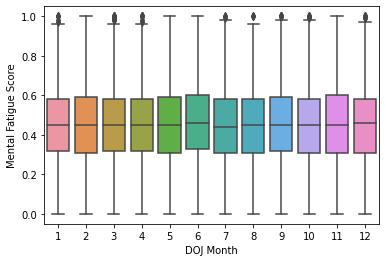

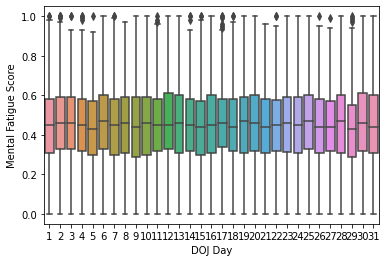

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in train.columns:
    if feature == 'ID':
        print()
    else:
        sns.boxplot(x=feature,y='Mental Fatigue Score',data=train)
        plt.show()

In [584]:
#for feature in ['Age','Tenure','Vacations taken','Average Hours worked per day','Employee satisfaction score']:
    #sns.regplot(x=feature,y='Mental Fatigue Score',data=train)
    #plt.show()

In [585]:
for f in train.columns:
    train[f] = train[f].astype('float64')

In [586]:
for f in test.columns:
    test[f] = test[f].astype('float64')

# Train Test Split

In [587]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

In [588]:
df_train.head()

,Age,Tenure,Vacations taken,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,Male,Service,Yes,1,2,3,4,5,DOJ Month,DOJ Day
6949,50.0,7.0,7.0,6.0,7.4,0.66,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10.0
9463,49.0,13.0,9.0,1.0,1.5,0.12,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,19.0
17526,52.0,20.0,4.0,3.0,4.3,0.34,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,14.0
317,58.0,10.0,0.0,4.0,7.0,0.47,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,16.0
20034,42.0,7.0,10.0,5.0,6.6,0.63,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,29.0


In [589]:
num_vars = ['Age','Tenure','Vacations taken','Average Hours worked per day','Employee satisfaction score']

In [590]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Age,Tenure,Vacations taken,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,Male,Service,Yes,1,2,3,4,5,DOJ Month,DOJ Day
6949,0.659091,0.315789,0.583333,0.555556,0.74,0.66,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10.0
9463,0.636364,0.631579,0.750000,0.000000,0.15,0.12,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,19.0
17526,0.704545,1.000000,0.333333,0.222222,0.43,0.34,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,14.0
317,0.840909,0.473684,0.000000,0.333333,0.70,0.47,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,16.0
20034,0.477273,0.315789,0.833333,0.444444,0.66,0.63,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,29.0


In [591]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [592]:
y_train = df_train.pop('Mental Fatigue Score')
X_train = df_train

In [593]:
y_test = df_test.pop('Mental Fatigue Score')
X_test = df_test

In [594]:
X_test.shape, y_test.shape, y_train.shape, X_train.shape

((5601, 15), (5601,), (13069,), (13069, 15))

In [595]:
X_train.head()

,Age,Tenure,Vacations taken,Average Hours worked per day,Employee satisfaction score,Male,Service,Yes,1,2,3,4,5,DOJ Month,DOJ Day
6949,0.659091,0.315789,0.583333,0.555556,0.74,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10.0
9463,0.636364,0.631579,0.750000,0.000000,0.15,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,19.0
17526,0.704545,1.000000,0.333333,0.222222,0.43,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,14.0
317,0.840909,0.473684,0.000000,0.333333,0.70,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,16.0
20034,0.477273,0.315789,0.833333,0.444444,0.66,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,29.0


In [596]:
X_test.head()

,Age,Tenure,Vacations taken,Average Hours worked per day,Employee satisfaction score,Male,Service,Yes,1,2,3,4,5,DOJ Month,DOJ Day
15455,0.022727,0.000000,0.416667,0.000000,0.34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0
8964,0.772727,0.263158,0.750000,0.444444,0.71,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,27.0
6401,0.568182,0.000000,0.083333,0.555556,0.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,12.0
2680,0.613636,0.578947,0.166667,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,14.0
12926,0.500000,0.157895,1.000000,0.666667,0.80,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,26.0


# Models

## Random Forest

In [597]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

In [598]:
regr = RandomForestRegressor(random_state=0)  
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [599]:
y_pred = regr.predict(X_train)

In [600]:
from sklearn.metrics import r2_score
score = r2_score(y_train,y_pred)
score

0.9855438138777429

In [601]:
y_pred = regr.predict(X_test)

In [602]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8971772494824719

In [603]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": regr.feature_importances_})
imp_df = imp_df.sort_values(by="Imp", ascending=False)
imp_df

,Varname,Imp
4,Employee satisfaction score,0.879964
3,Average Hours worked per day,0.032098
0,Age,0.017045
14,DOJ Day,0.016863
1,Tenure,0.014262
2,Vacations taken,0.012179
13,DOJ Month,0.011773
7,Yes,0.003494
5,Male,0.002839
6,Service,0.002490


In [604]:
imp_f = imp_df['Varname'].head(8)
imp_f

4      Employee satisfaction score
3     Average Hours worked per day
0                              Age
14                         DOJ Day
1                           Tenure
2                  Vacations taken
13                       DOJ Month
7                              Yes
Name: Varname, dtype: object

Text(0.5, 1.0, 'Feature Importance with RFC')

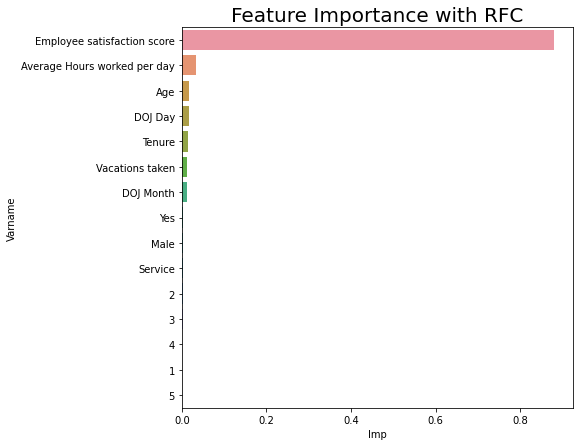

In [605]:
from matplotlib import pyplot
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(y='Varname',x='Imp', data=imp_df,ax=ax) #set_xticklabels(rotation=90, labels=imp_df['Varname'].unique())
plt.title('Feature Importance with RFC', fontsize=20)

In [606]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train[imp_f], y_train)

RandomForestRegressor(random_state=0)

In [607]:
y_pred = regr.predict(X_train[imp_f])

# RMSE Computation
rmse = np.sqrt(MSE(y_train, y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
score = r2_score(y_train,y_pred)
score

RMSE :  0.024376


0.9850828593497408

In [608]:
y_pred = regr.predict(X_test[imp_f])

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

RMSE :  0.065064


0.8938417719438776

## XGBOOST

In [609]:
import xgboost as xg  

In [662]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators =10, seed = 123,learning_rate=0.3,max_depth=7)

In [663]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[20:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [664]:
# Predict the model
pred = xgb_r.predict(X_train)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))

score = r2_score(y_train,pred)
score

RMSE :  0.056138


0.9208822494135033

In [665]:
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

score = r2_score(y_test,pred)
score

RMSE :  0.062989


0.9005022717140942